In [1]:
from astropy.io import ascii
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np

In [2]:
leiptr = ascii.read("/Users/Krose/Downloads/leiptr.csv")

## Magnesium Abudance w/ GC Data from Sam

In [3]:
carretta = ascii.read("/Users/Krose/Downloads/carretta_gc.txt",\
                      delimiter='|', header_start=0)

carretta.rename_column('e_fe',  'e[Fe/H]')
carretta.rename_column('e_o',   'e[O/Fe]')
carretta.rename_column('e_na',  'e[Na/Fe]')
carretta.rename_column('e_mg',  'e[Mg/Fe]')
carretta.rename_column('e_al',  'e[Al/Fe]')
carretta.rename_column('e_si',  'e[Si/Fe]')


carretta.remove_column("_1")
carretta.remove_column("col0")

In [4]:
import itertools

marker = itertools.cycle(('P', 'D', 'o', '*', 'v', '^', '<', '>', "8", "h"))

C:\Users\Krose\AppData\Local\Temp\ipykernel_17572\2984680365.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(gc["[Fe/H]"][pop1_indices], gc["[Mg/Fe]"][pop1_indices],\


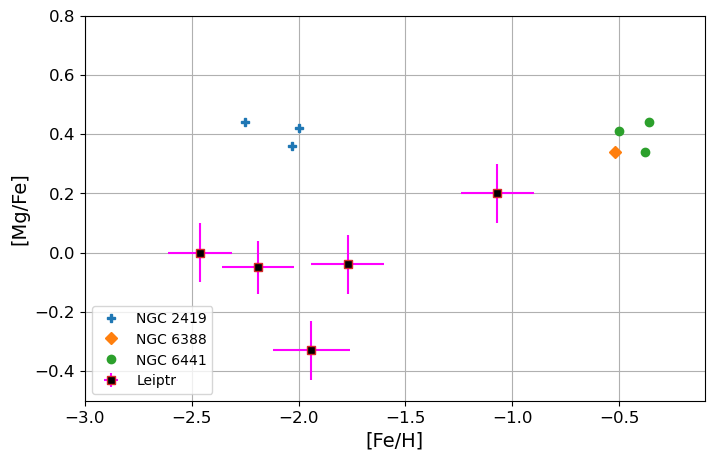

In [5]:
plt.figure(figsize=(8,5))

range_width = 0.1

for GC in np.unique(carretta["NGC"]):
    
    mark = next(marker)
    
    GC_indices = np.where(carretta["NGC"] == GC)[0]
    
    gc = carretta[GC_indices]
    
    max_mg = np.amax(gc["[Mg/Fe]"])
    mg_range = max_mg - range_width
    pop1_indices = (gc["[Mg/Fe]"] > mg_range)
    
    plt.errorbar(gc["[Fe/H]"][pop1_indices], gc["[Mg/Fe]"][pop1_indices],\
#                 xerr=carretta2["[Fe/H]"][GC_indices], yerr=carretta2["[Mg/Fe]"][GC_indices],\
                label="NGC "+str(GC), fmt="o", capsize=2, marker=mark)
    
plt.ylabel('[Mg/Fe]')
plt.xlabel('[Fe/H]')
plt.errorbar(leiptr["[Fe/H]"], leiptr["[Mg/Fe]"], xerr=leiptr["e-Fe"], yerr=leiptr["e-Mg"], ecolor='magenta', marker='s', mfc='black', ls='none', label='Leiptr')
    
plt.xlabel("[Fe/H]", fontsize=14)
plt.ylabel("[Mg/Fe]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-3, -0.1)
plt.ylim(-0.5, 0.8)
plt.legend(loc="lower left", fontsize=10)
plt.grid()

## Frebel 2013 Plots

In [6]:
# rows: 'EEP', 'M/Mo', 'LogTeff', 'LogG', 'LogL/Lo', 'G', 'B', 'R'
iso_249 = ascii.read("/Users/Krose/Downloads/iso_-2.49.iso")
iso_20 = ascii.read("/Users/Krose/Downloads/iso_-2.0.iso")
iso_15 = ascii.read("/Users/Krose/Downloads/iso_-1.5.iso")

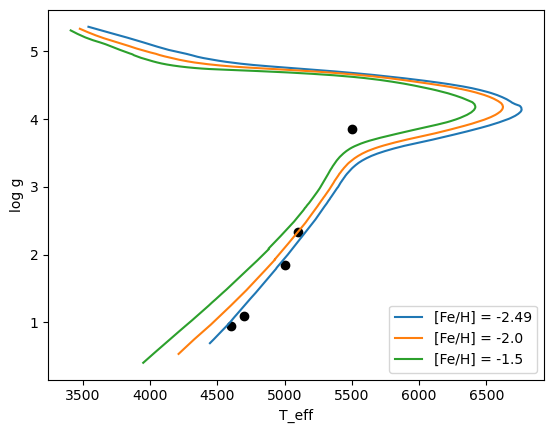

In [7]:
plt.plot(leiptr["T_eff_c"], leiptr["log g"], 'ok')
plt.plot(10**iso_249['col3'], iso_249['col4'], label='[Fe/H] = -2.49')
plt.plot(10**iso_20['col3'], iso_20['col4'], label='[Fe/H] = -2.0')
plt.plot(10**iso_15['col3'], iso_15['col4'], label='[Fe/H] = -1.5')
plt.xlabel('T_eff')
plt.ylabel('log g')
plt.legend()

In [8]:
# EEP > 111
iso_249_cut = iso_249[iso_249['col1'] > 111]
iso_20_cut = iso_20[iso_20['col1'] > 111]
iso_15_cut = iso_15[iso_15['col1'] > 111]

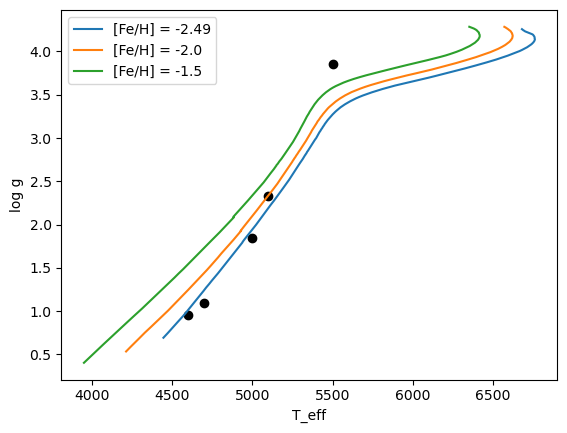

In [9]:
plt.plot(leiptr["T_eff_c"], leiptr["log g"], 'ok')
plt.plot(10**iso_249_cut['col3'], iso_249_cut['col4'], label='[Fe/H] = -2.49')
plt.plot(10**iso_20_cut['col3'], iso_20_cut['col4'], label='[Fe/H] = -2.0')
plt.plot(10**iso_15_cut['col3'], iso_15_cut['col4'], label='[Fe/H] = -1.5')
plt.xlabel('T_eff')
plt.ylabel('log g')
plt.legend()

Text(0.02, 0.5, 'v_mic')

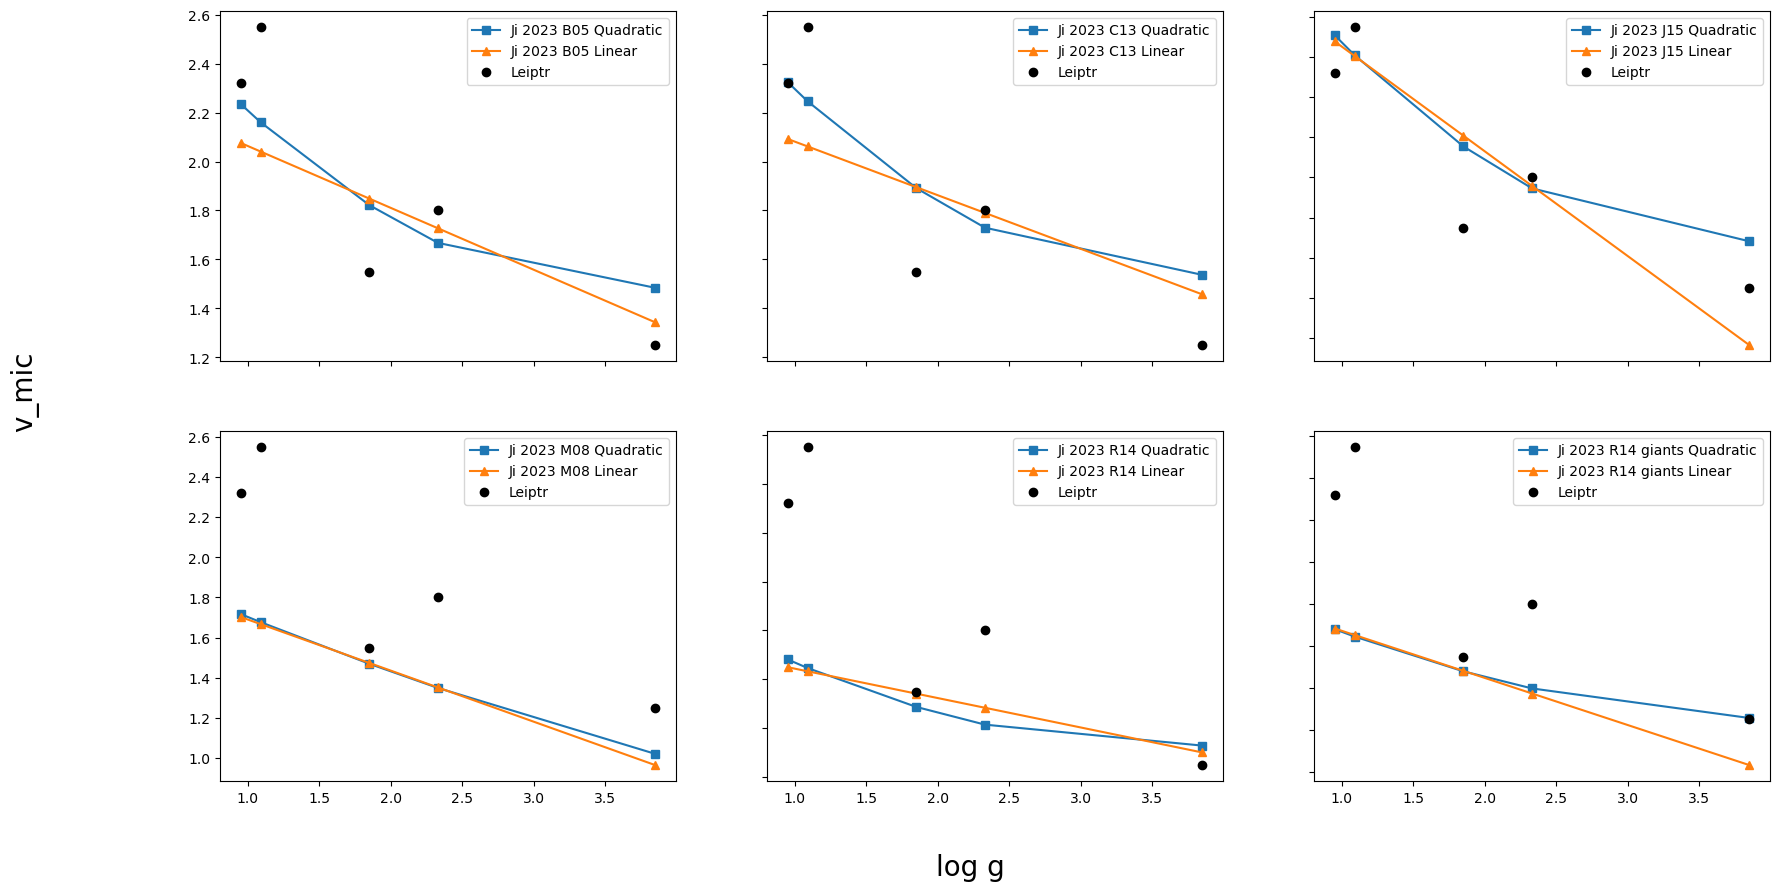

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))
leiptr['log g'], leiptr['vt'] = zip(*sorted(zip(leiptr['log g'], leiptr['vt'])))

ax1.plot(leiptr['log g'], 0.1001*leiptr['log g']**2 - 0.7394*leiptr['log g'] + 2.847, label='Ji 2023 B05 Quadratic', marker='s')
ax1.plot(leiptr['log g'], -0.2527*leiptr['log g'] + 2.316, label='Ji 2023 B05 Linear', marker='^')
ax2.plot(leiptr['log g'], 0.1048*leiptr['log g']**2 - 0.7744*leiptr['log g'] + 2.965, label='Ji 2023 C13 Quadratic', marker='s')
ax2.plot(leiptr['log g'], -0.2189*leiptr['log g'] + 2.300, label='Ji 2023 C13 Linear', marker='^')
ax3.plot(leiptr['log g'], 0.1307*leiptr['log g']**2 - 0.9812*leiptr['log g'] + 3.322, label='Ji 2023 J15 Quadratic', marker='s')
ax3.plot(leiptr['log g'], -0.5217*leiptr['log g'] + 2.973, label='Ji 2023 J15 Linear', marker='^')
ax4.plot(leiptr['log g'], 0.0175*leiptr['log g']**2 - 0.3242*leiptr['log g'] + 2.009, label='Ji 2023 M08 Quadratic', marker='s')
ax4.plot(leiptr['log g'], -0.2545*leiptr['log g'] + 1.944, label='Ji 2023 M08 Linear', marker='^')
ax5.plot(leiptr['log g'], 0.0471*leiptr['log g']**2 - 0.3474*leiptr['log g'] + 1.969, label='Ji 2023 R14 Quadratic', marker='s')
ax5.plot(leiptr['log g'], -0.1201*leiptr['log g'] + 1.764, label='Ji 2023 R14 Linear', marker='^')
ax6.plot(leiptr['log g'], 0.0386*leiptr['log g']**2 - 0.3313*leiptr['log g'] + 1.960, label='Ji 2023 R14 giants Quadratic', marker='s')
ax6.plot(leiptr['log g'], -0.2247*leiptr['log g'] + 1.897, label='Ji 2023 R14 giants Linear', marker='^')


for ax in fig.get_axes():
    ax.label_outer()
    ax.plot(leiptr["log g"], leiptr["vt"], 'ok', label='Leiptr')
    ax.legend()

fig.supxlabel('log g', fontsize=20)
fig.supylabel('v_mic', fontsize=20)

## Abundance Grids

Text(0.02, 0.5, '[X/Fe]')

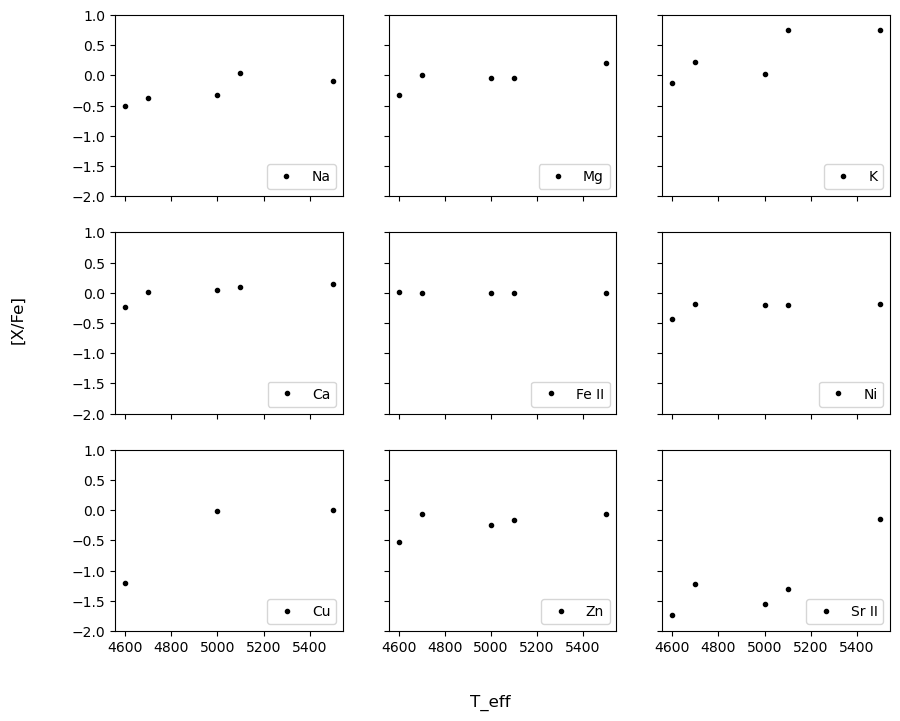

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10, 8))
ax1.plot(leiptr['T_eff_c'], leiptr['[Na/Fe]'], '.k', label='Na')
ax2.plot(leiptr['T_eff_c'], leiptr['[Mg/Fe]'], '.k', label='Mg')
ax3.plot(leiptr['T_eff_c'], leiptr['[K/Fe]'], '.k', label='K')
ax4.plot(leiptr['T_eff_c'], leiptr['[Ca/Fe]'], '.k', label='Ca')
ax5.plot(leiptr['T_eff_c'], leiptr['[Fe II/Fe]'], '.k', label='Fe II')
ax6.plot(leiptr['T_eff_c'], leiptr['[Ni/Fe]'], '.k', label='Ni')
ax7.plot(leiptr['T_eff_c'], leiptr['[Cu/Fe]'], '.k', label='Cu')
ax8.plot(leiptr['T_eff_c'], leiptr['[Zn/Fe]'], '.k', label='Zn')
ax9.plot(leiptr['T_eff_c'], leiptr['[Sr II/Fe]'], '.k', label='Sr II')

for ax in fig.get_axes():
    ax.legend(loc='lower right')
    ax.set_ylim(-2.0, 1.0)
    ax.label_outer()

fig.supxlabel('T_eff')
fig.supylabel('[X/Fe]')

Text(0.02, 0.5, '[X/Fe]')

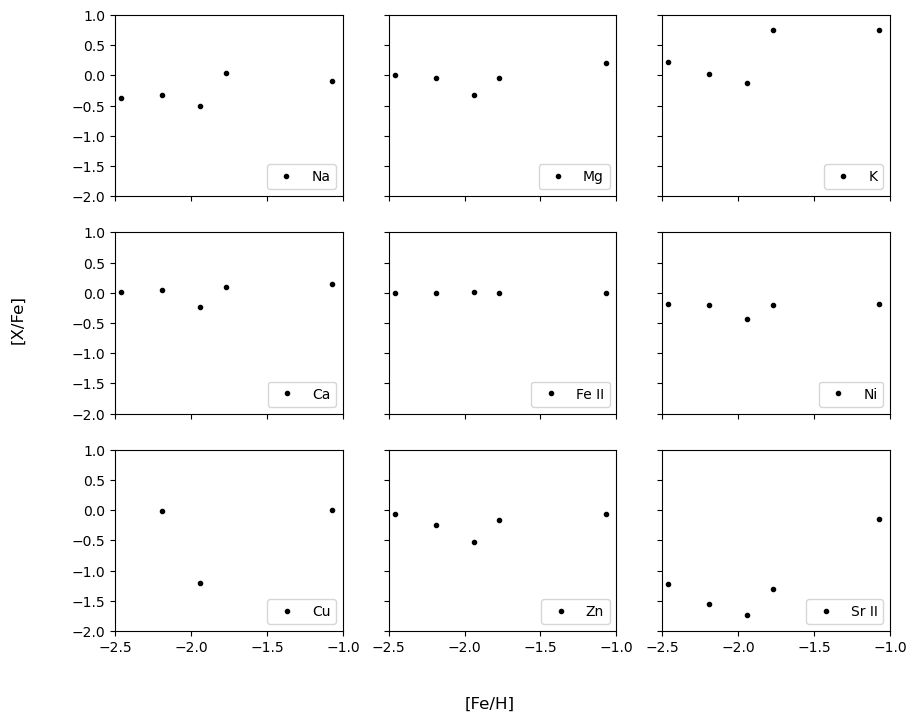

In [12]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10, 8))
ax1.plot(leiptr['[Fe/H]'], leiptr['[Na/Fe]'], '.k', label='Na')
ax2.plot(leiptr['[Fe/H]'], leiptr['[Mg/Fe]'], '.k', label='Mg')
ax3.plot(leiptr['[Fe/H]'], leiptr['[K/Fe]'], '.k', label='K')
ax4.plot(leiptr['[Fe/H]'], leiptr['[Ca/Fe]'], '.k', label='Ca')
ax5.plot(leiptr['[Fe/H]'], leiptr['[Fe II/Fe]'], '.k', label='Fe II')
ax6.plot(leiptr['[Fe/H]'], leiptr['[Ni/Fe]'], '.k', label='Ni')
ax7.plot(leiptr['[Fe/H]'], leiptr['[Cu/Fe]'], '.k', label='Cu')
ax8.plot(leiptr['[Fe/H]'], leiptr['[Zn/Fe]'], '.k', label='Zn')
ax9.plot(leiptr['[Fe/H]'], leiptr['[Sr II/Fe]'], '.k', label='Sr II')

for ax in fig.get_axes():
    ax.legend(loc='lower right')
    ax.set_xlim(-2.5, -1.0)
    ax.set_ylim(-2.0, 1.0)
    ax.label_outer()

fig.supxlabel('[Fe/H]')
fig.supylabel('[X/Fe]')